<a href="https://colab.research.google.com/github/LeoGRibeiro/trabalho-1-llm/blob/main/trabalho1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

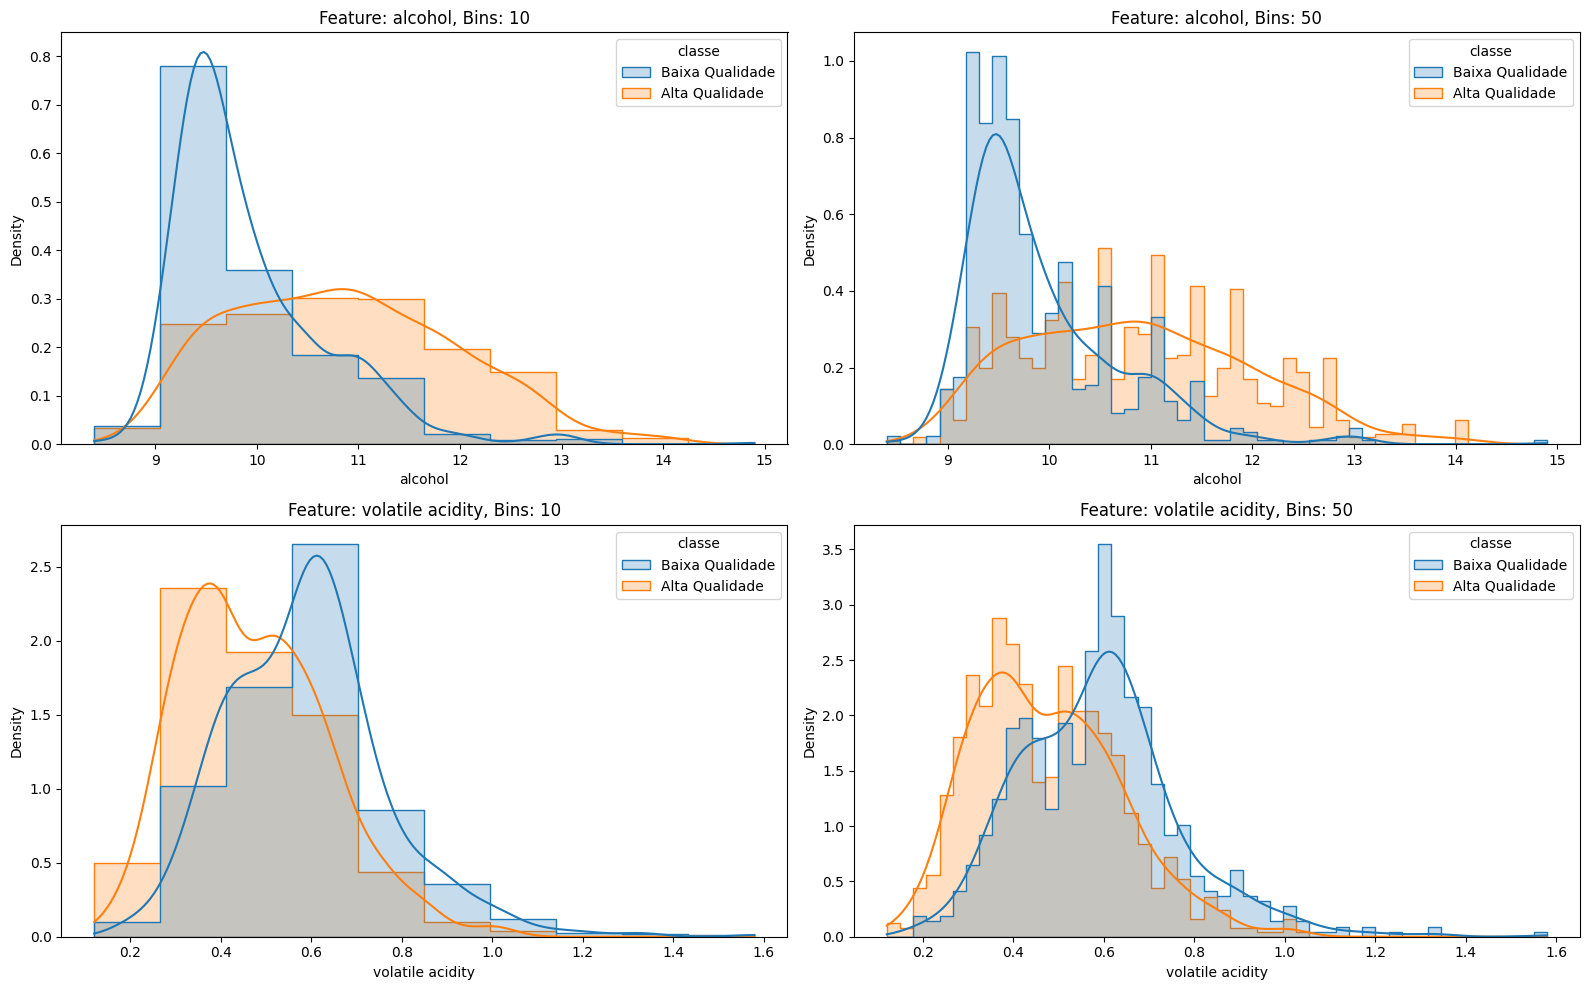

In [13]:
# Parte A
# O conjunto de dados utilizados foi um sobre Qualidade de Vinho do repositório UCI Machine Learning. Tem o objetivo de prever uma nota para o vinho baseado em vários fatores da composição qúimica do vinho
dados = 'https://raw.githubusercontent.com/LeoGRibeiro/trabalho-1-llm/refs/heads/main/winequality-red.csv'

df = pd.read_csv(dados, sep=';')

# Para adequar ao trabalho classifiquei a qualidade dos vinhos em bom e ruim com base na nota, sendo bom superior a 5 e ruim sendo 5 ou menos
df['classe'] = df['quality'].apply(lambda x: 'Alta Qualidade' if x > 5 else 'Baixa Qualidade')

# As features escolhidas que tinham uma tendencia a apresentarem melhores resultados
features = ['alcohol', 'volatile acidity']
bins = [10, 50] # Bins de diferentes tamanhos

# Plot do gráfico
plt.figure(figsize=(16, 10))
plot_idx=1
for feature in features:
    for bin in bins:
      plt.subplot(2, 2, plot_idx)


      sns.histplot(data=df,
                   x=feature,
                   hue='classe',
                   kde=True,
                   bins=bin,
                   element='step',
                   stat = 'density',
                   common_norm=False)

      plt.title(f'Feature: {feature}, Bins: {bin}')
      plot_idx += 1

plt.tight_layout()
plt.show()

Podemos perceber que as duas features mostraram serem bons indicativos para definir a qualidade de um vinho em, no qual quanto maior a concentração de álcool, melhor a qualidade do vinho e quanto menor a acidez volátil, também resulta em melhores vinhos. A diferença entre os tamanhos das bins muda a a percepção do entendimento do gráfico, sendo mais compreensível quando tem menos bins porém pode esconder informações preciosas para uma análise robusta. A maior quantidade de bins pode parecer que não existem padrões, com ruídos, porém permite uma análise mais profunda e precisa que pode ser útil para estudos mais específicos.  

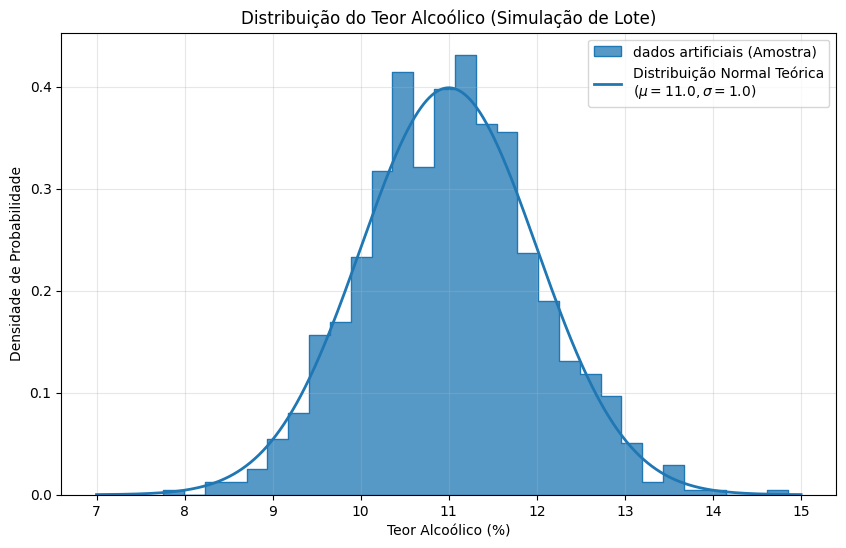

--- Análise de Probabilidade (Álcool > 13.0%) ---
Probabilidade Real (Não Padronizada): 2.28%
Cálculo Padronizado (Z-Score):
O valor Z para 13.0% é: 2.00
Probabilidade pelo Z-Score: 2.28%


In [18]:
# Parte B
# Vamos calcular a probalilidade de um vinho ter um teor alcoólico acima de 13% que pode garantir que o produto tem a qualidade boa com dados gerados de 1000 garrafas.
# A média será: 11.0
# Desvio padrão: 1.0

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import pandas as pd

# Definição de parâmetros
media = 11.0
desvio = 1.0
n_de_amostras = 1000
valor_de_corte = 13.0

# Geração de dados aleatórios
np.random.seed(42)
dados_gerados = np.random.normal(loc=media,scale=desvio,size=n_de_amostras)

# Plotagem
plt.figure(figsize=(10,6))

sns.histplot(dados_gerados, bins=30, kde=False, stat='density', label='dados artificiais (Amostra)', element= 'step')


x_axis = np.linspace(media - 4 * desvio, media +4 *desvio,1000)
plt.plot(x_axis,norm.pdf(x_axis,media,desvio),linewidth=2, label = f'Distribuição Normal Teórica\n($\\mu={media}, \\sigma={desvio}$)')

plt.title('Distribuição do Teor Alcoólico (Simulação de Lote)')
plt.xlabel('Teor Alcoólico (%)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Cálculos de Probabilidade
# Agora realizamos o cálculo da probabilidade de encontrar um vinho com teor alcoólico superior a 13%
# Faremos de duas formas: usando a distribuição original e a padronizada (Z-Score)

print(f"--- Análise de Probabilidade (Álcool > {valor_de_corte}%) ---")

# 1. Cálculo não Padronizado (Direto)
# Utilizando a função de densidade acumulada (CDF) com os parâmetros originais da amostra
prob_nao_padronizada = 1 - norm.cdf(valor_de_corte, loc=media, scale=desvio)
print(f"Probabilidade Real (Não Padronizada): {prob_nao_padronizada*100:.2f}%")

# 2. Cálculo Padronizado (Z-Score)
# Normalizamos o valor para a escala padrão onde média é 0 e desvio é 1
# Fórmula: Z = (X - média) / desvio
z_score = (valor_de_corte - media) / desvio

print(f"Cálculo Padronizado (Z-Score):")
print(f"O valor Z para {valor_de_corte}% é: {z_score:.2f}")

# Buscamos a probabilidade correspondente ao Z na tabela normal padrão
prob_padronizada = 1 - norm.cdf(z_score)
print(f"Probabilidade pelo Z-Score: {prob_padronizada*100:.2f}%")


Podemos observar que tanto o cálculo direto quanto o padronizado resultam no mesmo valor de probabilidade (aprox 2.28%). A padronização (Z-Score) é útil pois transforma qualquer unidade (neste caso, % de álcool) em um valor universal,
permitindo comparar distribuições diferentes ou usar tabelas estatísticas padrão, como feito no exemplo da pizza em sala.
